In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

656

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a87cccea06092130398e827240b4207a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | ibra
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | japaratuba
Processing Record 8 of Set 1 | portland
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | canatlan
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | conceicao da barra
Processing Record 19 of Set 1 | middelburg
Processing Record 20 of Set 1 | pinos puente
Processing Record 21 of Set 1 | salekha

Processing Record 35 of Set 4 | ruwi
Processing Record 36 of Set 4 | tigzirt
Processing Record 37 of Set 4 | muroto
Processing Record 38 of Set 4 | tynda
Processing Record 39 of Set 4 | kutum
Processing Record 40 of Set 4 | zhuhai
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | shambu
Processing Record 43 of Set 4 | bogorodskoye
Processing Record 44 of Set 4 | malakal
Processing Record 45 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 46 of Set 4 | sola
Processing Record 47 of Set 4 | chara
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | nelson bay
Processing Record 50 of Set 4 | ahmadpur east
Processing Record 1 of Set 5 | stawell
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | tezu
Processing Record 4 of Set 5 | oranjemund
Processing Record 5 of Set 5 | conchas
Processing Record 6 of Set 5 | carutapera
Processing Record 7 of Set 5 | lavrentiya
Processing Record 8 of Set 5 | mehamn
Processing Re

Processing Record 25 of Set 8 | khandyga
Processing Record 26 of Set 8 | muzhi
Processing Record 27 of Set 8 | ostrovnoy
Processing Record 28 of Set 8 | burgeo
Processing Record 29 of Set 8 | santiago del estero
Processing Record 30 of Set 8 | stornoway
Processing Record 31 of Set 8 | deniliquin
Processing Record 32 of Set 8 | ixtapa
Processing Record 33 of Set 8 | barbar
City not found. Skipping...
Processing Record 34 of Set 8 | zurrieq
Processing Record 35 of Set 8 | hirara
Processing Record 36 of Set 8 | novyy urengoy
Processing Record 37 of Set 8 | nanakuli
Processing Record 38 of Set 8 | illapel
Processing Record 39 of Set 8 | homer
Processing Record 40 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 8 | rocha
Processing Record 42 of Set 8 | taywarah
Processing Record 43 of Set 8 | coffs harbour
Processing Record 44 of Set 8 | les cayes
Processing Record 45 of Set 8 | namibe
Processing Record 46 of Set 8 | mount gambier
Processing Record 47 of Set 8 | 

Processing Record 14 of Set 12 | swift current
Processing Record 15 of Set 12 | tivaouane
Processing Record 16 of Set 12 | bathsheba
Processing Record 17 of Set 12 | puerto colombia
Processing Record 18 of Set 12 | proletariy
Processing Record 19 of Set 12 | aleksandrov gay
Processing Record 20 of Set 12 | villanueva de cordoba
Processing Record 21 of Set 12 | bonavista
Processing Record 22 of Set 12 | astoria
Processing Record 23 of Set 12 | guadalupe victoria
Processing Record 24 of Set 12 | opuwo
Processing Record 25 of Set 12 | puerto leguizamo
Processing Record 26 of Set 12 | tateyama
Processing Record 27 of Set 12 | dumas
Processing Record 28 of Set 12 | anloga
Processing Record 29 of Set 12 | le pradet
Processing Record 30 of Set 12 | luau
Processing Record 31 of Set 12 | westport
Processing Record 32 of Set 12 | eidfjord
Processing Record 33 of Set 12 | huayang
Processing Record 34 of Set 12 | adeje
Processing Record 35 of Set 12 | hambantota
Processing Record 36 of Set 12 | ga

In [11]:
len(city_data)

601

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sitka,57.05,-135.33,35.60,93,75,10.29,US,2020-11-04 04:10:17
1,Ibra,22.69,58.53,73.36,23,0,0.98,OM,2020-11-04 04:15:08
2,Barrow,71.29,-156.79,15.80,78,90,14.99,US,2020-11-04 04:15:09
3,Mataura,-46.19,168.86,66.99,60,42,8.01,NZ,2020-11-04 04:15:09
4,Saint-Pierre,-21.34,55.48,77.00,50,0,13.87,RE,2020-11-04 04:15:10
5,Japaratuba,-10.59,-36.94,78.80,88,75,3.36,BR,2020-11-04 04:15:10
6,Portland,45.52,-122.68,60.01,93,90,5.82,US,2020-11-04 04:14:09
7,Jamestown,42.10,-79.24,43.00,69,1,8.05,US,2020-11-04 04:15:10
8,Ushuaia,-54.80,-68.30,50.00,66,75,12.75,AR,2020-11-04 04:11:16
9,Bengkulu,-3.80,102.27,83.75,67,80,5.28,ID,2020-11-04 04:15:11


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sitka,US,2020-11-04 04:10:17,57.05,-135.33,35.60,93,75,10.29
1,Ibra,OM,2020-11-04 04:15:08,22.69,58.53,73.36,23,0,0.98
2,Barrow,US,2020-11-04 04:15:09,71.29,-156.79,15.80,78,90,14.99
3,Mataura,NZ,2020-11-04 04:15:09,-46.19,168.86,66.99,60,42,8.01
4,Saint-Pierre,RE,2020-11-04 04:15:10,-21.34,55.48,77.00,50,0,13.87
5,Japaratuba,BR,2020-11-04 04:15:10,-10.59,-36.94,78.80,88,75,3.36
6,Portland,US,2020-11-04 04:14:09,45.52,-122.68,60.01,93,90,5.82
7,Jamestown,US,2020-11-04 04:15:10,42.10,-79.24,43.00,69,1,8.05
8,Ushuaia,AR,2020-11-04 04:11:16,-54.80,-68.30,50.00,66,75,12.75
9,Bengkulu,ID,2020-11-04 04:15:11,-3.80,102.27,83.75,67,80,5.28


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time

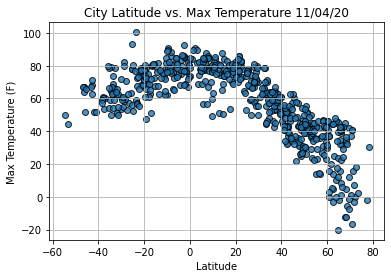

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

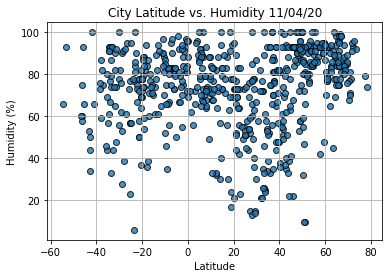

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

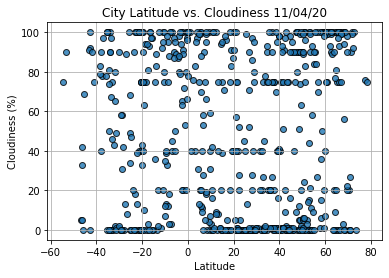

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

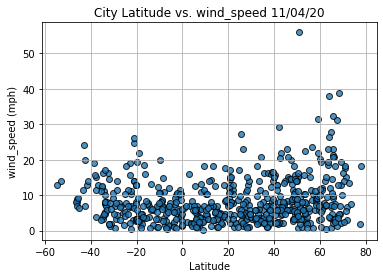

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed "+ time.strftime("%x"))
plt.ylabel("wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()